# Descriptive statistics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import csv

import pandas as pd
import matplotlib.pyplot as plt
import pickle
import datetime

In [2]:
df1 = pd.read_csv('/network/tmp1/barinpvi/data/canopex_envcan_all.csv')

In [3]:
df1['date'] = pd.to_datetime(df1['date'])
#df1.index = df1['date']

In [4]:
df1.head()

,date,precip,evap,discharge,max_temp,min_temp,lat,lon
0,1967-07-01,3.5242,NaN,NaN,15.6541,4.5701,54.8278,-102.6356
1,1967-07-02,0.0000,NaN,NaN,20.3122,3.2177,54.8278,-102.6356
2,1967-07-03,0.0000,NaN,NaN,23.2121,6.0913,54.8278,-102.6356
3,1967-07-04,1.9314,NaN,NaN,28.0677,11.5386,54.8278,-102.6356
4,1967-07-05,3.3118,NaN,NaN,20.7560,8.0199,54.8278,-102.6356


In [5]:
df1['discharge'].mean()

1.4257867976949026

In [6]:
df1['discharge'].max()

99.8579

In [7]:
df1['discharge'].min()

0.0

In [8]:
df1['discharge'].std()

2.712214709609735

In [5]:
df100 = pd.read_csv('/network/tmp1/barinpvi/data/preprocessed_canopex_envcan/100.csv')

df100['date'] = pd.to_datetime(df100['date'])

# Plots

### Single location (100.csv): Little Smoky, Alberta

In [24]:
for i in range(1, 13):
    print(i)
    print("- MEAN -")
    print(df100.loc[(df1['date'].dt.month==i)].mean())
    print("- STD -")
    print(df100.loc[(df1['date'].dt.month==i)].std())
    print("----")

1
- MEAN -
precip         1.570705
evap                NaN
discharge      0.326701
max_temp      19.353706
min_temp       7.923680
lat           54.752000
lon         -117.205700
dtype: float64
- STD -
precip       2.412377e+00
evap                  NaN
discharge    5.805261e-01
max_temp     5.031000e+00
min_temp     3.163354e+00
lat          6.468258e-13
lon          2.701031e-13
dtype: float64
----
2
- MEAN -
precip         1.190627
evap                NaN
discharge      0.274461
max_temp      14.961398
min_temp       3.455494
lat           54.752000
lon         -117.205700
dtype: float64
- STD -
precip       2.087462e+00
evap                  NaN
discharge    4.707680e-01
max_temp     6.150623e+00
min_temp     3.774071e+00
lat          4.264933e-14
lon          1.137316e-12
dtype: float64
----
3
- MEAN -
precip         0.723867
evap          99.000000
discharge      0.174017
max_temp       9.430561
min_temp      -1.627079
lat           54.752000
lon         -117.205700
dtype: float6

In [24]:
means = []
stds = []
ns = []
for i in range(1, 13):
    means.append(df100.loc[(df100['date'].dt.month==i)]['discharge'].mean())
    stds.append(df100.loc[(df100['date'].dt.month==i)]['discharge'].std())
    ns.append(len(df100.loc[(df100['date'].dt.month==i)]))

In [25]:
p_means = []
p_stds = []
p_ns = []
for i in range(1, 13):
    p_means.append(df100.loc[(df100['date'].dt.month==i)]['precip'].mean())
    p_stds.append(df100.loc[(df100['date'].dt.month==i)]['precip'].std())
    p_ns.append(len(df100.loc[(df100['date'].dt.month==i)]))

In [22]:
maxt_means = []
maxt_stds = []
maxt_ns = []
for i in range(1, 13):
    maxt_means.append(df100.loc[(df100['date'].dt.month==i)]['max_temp'].mean())
    maxt_stds.append(df100.loc[(df100['date'].dt.month==i)]['max_temp'].std())
    maxt_ns.append(len(df100.loc[(df100['date'].dt.month==i)]))

In [28]:
mint_means = []
mint_stds = []
mint_ns = []
for i in range(1, 13):
    mint_means.append(df100.loc[(df100['date'].dt.month==i)]['min_temp'].mean())
    mint_stds.append(df100.loc[(df100['date'].dt.month==i)]['min_temp'].std())
    mint_ns.append(len(df100.loc[(df100['date'].dt.month==i)]))

In [34]:
df100.head()

,date,precip,evap,discharge,max_temp,min_temp,lat,lon
0,1968-02-01,5.9554,NaN,NaN,-29.1428,-32.9766,54.752,-117.2057
1,1968-02-02,7.8870,NaN,NaN,-29.8786,-31.8214,54.752,-117.2057
2,1968-02-03,4.2104,NaN,NaN,-13.9552,-36.3428,54.752,-117.2057
3,1968-02-04,0.0000,NaN,NaN,2.4909,-30.9786,54.752,-117.2057
4,1968-02-05,0.0000,NaN,NaN,0.6552,-24.4662,54.752,-117.2057


Text(0, 0.5, 'mm')

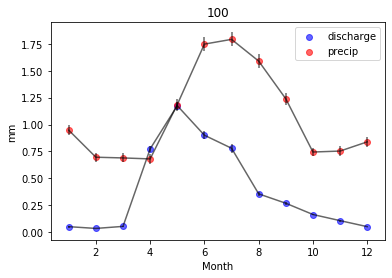

In [46]:
plt.scatter(np.arange(1, 13), means, color='blue', alpha=0.6, label='discharge')
plt.errorbar(np.arange(1, 13), means, (stds/np.sqrt(ns)), color='black', alpha=0.6)

plt.scatter(np.arange(1, 13), p_means, color='red', alpha=0.6, label='precip')
plt.errorbar(np.arange(1, 13), p_means, (p_stds/np.sqrt(p_ns)), color='black', alpha=0.6)

plt.legend()
plt.title("100")
plt.xlabel("Month")
plt.ylabel("mm")

Text(0, 0.5, '')

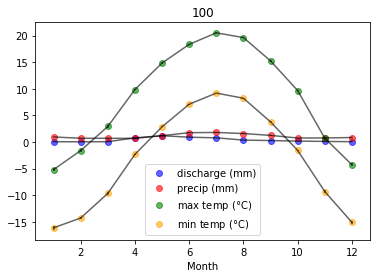

In [31]:
plt.scatter(np.arange(1, 13), means, color='blue', alpha=0.6, label='discharge (mm)')
plt.errorbar(np.arange(1, 13), means, (stds/np.sqrt(ns)), color='black', alpha=0.6)

plt.scatter(np.arange(1, 13), p_means, color='red', alpha=0.6, label='precip (mm)')
plt.errorbar(np.arange(1, 13), p_means, (p_stds/np.sqrt(p_ns)), color='black', alpha=0.6)

plt.scatter(np.arange(1, 13), maxt_means, color='green', alpha=0.6, label='max temp ($\degree$C)')
plt.errorbar(np.arange(1, 13), maxt_means, (maxt_stds/np.sqrt(maxt_ns)), color='black', alpha=0.6)

plt.scatter(np.arange(1, 13), mint_means, color='orange', alpha=0.6, label='min temp ($\degree$C)')
plt.errorbar(np.arange(1, 13), mint_means, (mint_stds/np.sqrt(mint_ns)), color='black', alpha=0.6)

plt.legend()
plt.title("100")
plt.xlabel("Month")
plt.ylabel("")

Temperature does not seem to be correlated on a monthly scale.

Should verify on a daily scale.

### All files (locations)

In [47]:
all_d_means = []
all_d_stds = []
all_d_ns = []
for i in range(1, 13):
    all_d_means.append(df1.loc[(df1['date'].dt.month==i)]['discharge'].mean())
    all_d_stds.append(df1.loc[(df1['date'].dt.month==i)]['discharge'].std())
    all_d_ns.append(len(df1.loc[(df1['date'].dt.month==i)]))

In [48]:
all_p_means = []
all_p_stds = []
all_p_ns = []
for i in range(1, 13):
    all_p_means.append(df1.loc[(df1['date'].dt.month==i)]['precip'].mean())
    all_p_stds.append(df1.loc[(df1['date'].dt.month==i)]['precip'].std())
    all_p_ns.append(len(df1.loc[(df1['date'].dt.month==i)]))

Text(0, 0.5, 'mm')

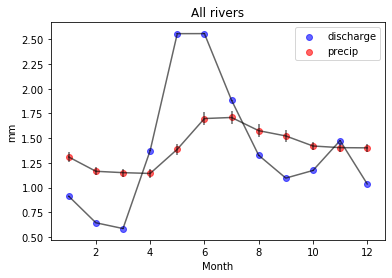

In [49]:
plt.scatter(np.arange(1, 13), all_d_means, color='blue', alpha=0.6, label='discharge')
plt.errorbar(np.arange(1, 13), all_d_means, (all_d_stds/np.sqrt(all_d_ns)), color='black', alpha=0.6)

plt.scatter(np.arange(1, 13), all_p_means, color='red', alpha=0.6, label='precip')
plt.errorbar(np.arange(1, 13), all_p_means, (p_stds/np.sqrt(p_ns)), color='black', alpha=0.6)

plt.legend()
plt.title("All rivers")
plt.xlabel("Month")
plt.ylabel("mm")

# Correlation coefficient

### All files

In [34]:
disch = df1['discharge'].fillna(method='bfill').fillna(method='ffill')

prec = df1['precip'].fillna(method='bfill').fillna(method='ffill')

In [67]:
np.cov(disch, prec)

array([[11.75028741,  0.1646915 ],
       [ 0.1646915 ,  5.74032992]])

In [68]:
np.corrcoef(disch, prec)

array([[1.        , 0.02005296],
       [0.02005296, 1.        ]])

The correlation coefficient between discharge and precipitation for all the time/location is of 0.02.

Positive: indicates that they are positively dependent (one increases the other).

Value: Low, since it is normalized between 0 and 1.

### File 100

In [69]:
disch100 = df100['discharge'].fillna(method='bfill').fillna(method='ffill')

prec100 = df100['precip'].fillna(method='bfill').fillna(method='ffill')

In [70]:
np.cov(disch100, prec100)

array([[1.42719266, 0.12352772],
       [0.12352772, 3.8892974 ]])

In [71]:
np.corrcoef(disch100, prec100)

array([[1.        , 0.05243093],
       [0.05243093, 1.        ]])

0.3 higher correlation coefficient locally.

### Per month

Text(0.5, 1.0, 'Discharge and precipitation correlation, loc 100')

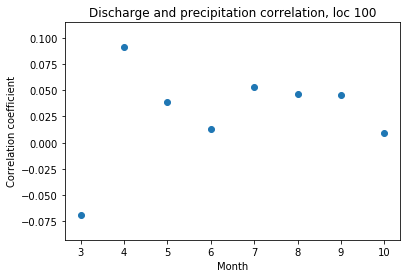

In [13]:
correlations = []
for i in range(1, 13):
    d = df100.loc[(df100['date'].dt.month==i)]['discharge']
    p = df100.loc[(df100['date'].dt.month==i)]['precip']
    c = np.corrcoef(d, p)[0,1]
    correlations.append(c)

plt.scatter(np.arange(1,13), correlations)
plt.xlabel("Month")
plt.ylabel("Correlation coefficient")
plt.title("Discharge and precipitation correlation, loc 100")

In [18]:
correlations = []
for i in range(1, 13):
    d = df1.loc[(df1['date'].dt.month==i)]['discharge'].fillna(method='bfill').fillna(method='ffill')
    p = df1.loc[(df1['date'].dt.month==i)]['precip'].fillna(method='bfill').fillna(method='ffill')
    c = np.corrcoef(d, p)[0,1]
    correlations.append(c)

Text(0.5, 1.0, 'Discharge and precipitation correlation - All locations')

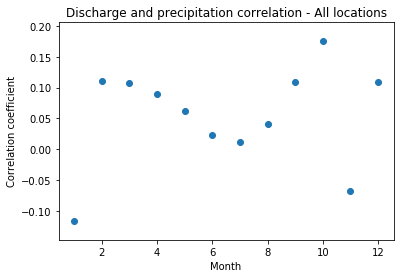

In [21]:
plt.scatter(np.arange(1,13), correlations)
plt.xlabel("Month")
plt.ylabel("Correlation coefficient")
plt.title("Discharge and precipitation correlation - All locations")

Negative correlation in January.

### Temperature

In [32]:
mxtemp = df1['max_temp'].fillna(method='bfill').fillna(method='ffill')

In [36]:
np.corrcoef(disch, mxtemp)

array([[1.        , 0.04091811],
       [0.04091811, 1.        ]])

In [38]:
np.corrcoef(prec, mxtemp)

array([[ 1.        , -0.30954554],
       [-0.30954554,  1.        ]])

### Checking the rest of the data

In [29]:
df1['evap'].max()

99.0

In [30]:
df1['evap'].min()

99.0

### NRCAN

In [33]:
df1 = pd.read_csv('/network/tmp1/barinpvi/data/canopex_nrcan_all.csv')

In [35]:
df1['evap'].max()

99.0

In [36]:
df1['evap'].min()

99.0

In [37]:
df1['discharge'].max()

99.8579

In [38]:
df1['discharge'].min()

-99.0

(array([2.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        2.286119e+06, 2.837608e+06, 1.077900e+04, 9.050000e+02,
        2.370000e+02, 8.300000e+01]),
 array([-99.     , -79.11421, -59.22842, -39.34263, -19.45684,   0.42895,
         20.31474,  40.20053,  60.08632,  79.97211,  99.8579 ]),
 <a list of 10 Patch objects>)

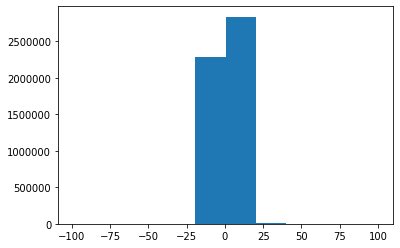

In [39]:
plt.hist(df1['discharge'])

Evaporation should not be used. NRCAN seems to need corrections because of the negative values.